## What are Graphs?

More general data structures than trees - think of tree as a special kind of graph.

## Vocabular and Definitions

### Vertex 

AKA Node, it can have a name (key) and additional information (payload)

### Edge

AKA arc - connecets two vertices to show relationship between them. They may be one-way or two-way. If all the edges in a graph are one-way, it is a <b> directed graph or digraph </b>

### Weight

Edges may have a weight to show the 'cost' of going from one node to another.

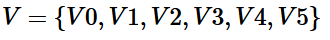

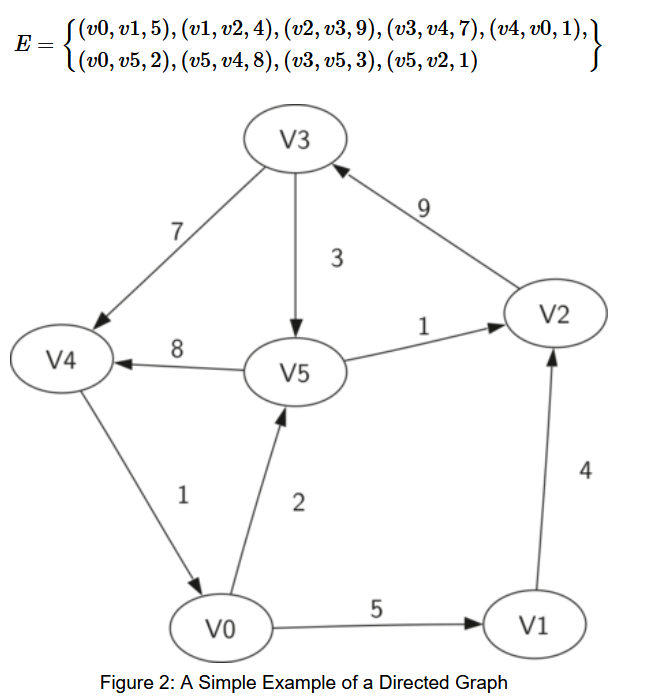

### Path

Sequence of nodes connected by edges.

###  Cycle

Path that starts and ends at same node. <b>A graph with no cycles is called an acyclic graph. A directed graph with no cycles is called a directed acyclic graph or a DAG</b>.

## The Graph ADT

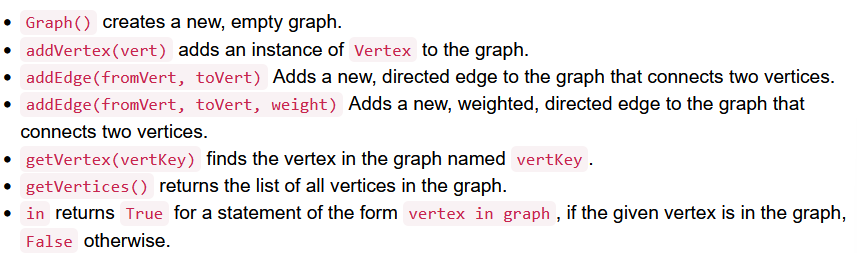

---

# Graph Implementation

## Adjacency Matrix

A two-dimensional matrix, with each of the rows and columns representing a node in the graph. The value stored in the cell represents the presence of an edge between the two intersected nodes. 

When two nodes are connected, we say they are <b>adjacent</b>

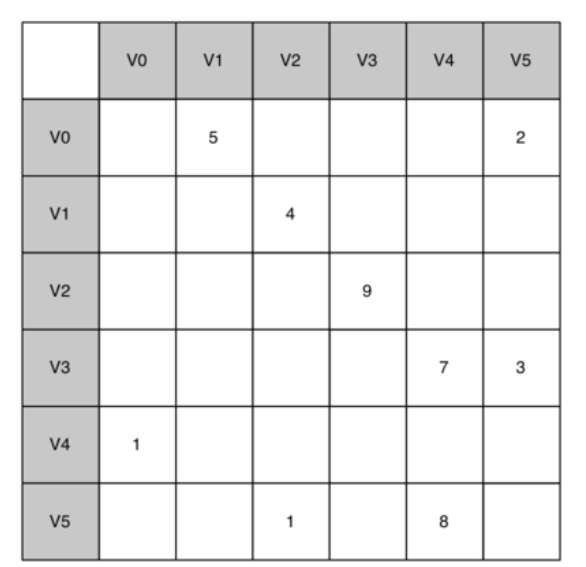

It is simple and easy for small graphs. However, it is a sparse matrix (lots of empty cells), and matrices are not a good way to store sparse data.

#### When to use?

The adjacency matrix is useful when there is a large number of edges in the graph. A matrix is full whenever all nodes are connected to every other node.

## Adjacency List

A more space-efficient way to implement a sparsely connected graph.

Keep a master list of all nodes in the Graph object, and each ndoe has a list of other nodes that is connected to. 

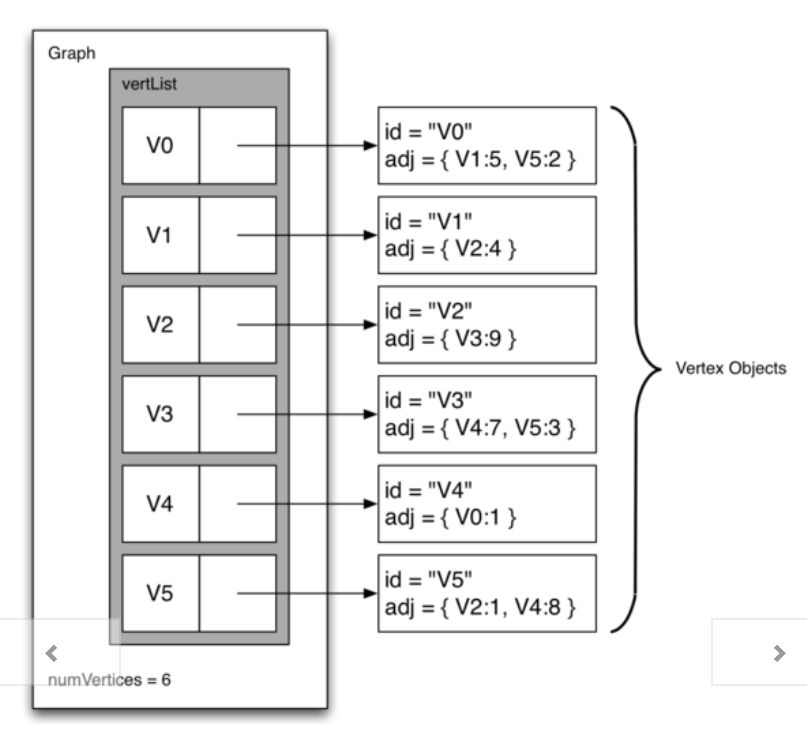

It allows us to compactly represent a sparse graph, and also easily find all nodes connected to a specific node.


### Adjacency List Implementation

In [6]:
class Graph:
    
    def __init__(self):
        self.master = {}
        self.numvertices = 0
    
    def addVertex(self,node_id):
        
        new_node = Vertex(node_id)
        self.numvertices += 1
        self.master[node_id] = new_node
        
    def getVertex(self,node_id):
        if node_id in self.master.keys():
            return self.master[node_id]
        
        else:
            return None
        
    def __contains__(self,n):
        return n in self.master.keys()

    
    def addEdge(self,fromNode,toNode,weight=0):
        
        if fromNode not in self.master.keys():
            self.addVertex(fromNode)
            
        if toNode not in self.master.keys():
            self.addVertex(toNode)
        
        self.master[fromNode].addConnection(toNode,weight)
    
    def get_Vertices(self):
        return self.master.keys()
    
    def __iter__(self):
        return iter(self.master.values())
    
    def __getitem__(self,key):
        return self.master[key]
    
    
        
        
      
class Queue:
    
    def __init__(self, queue = []):
        self.queue = []
        
    def enqueue(self, val):
        self.queue.append(val)
        
    def dequeue(self):
        return self.queue.pop(0)
    
    def show(self):
        return self.queue
    
    def size(self):
        return len(self.queue)
        
        

        
class Vertex:
    
    def __init__(self,node_id,color ='white',distance = 0, pred = None):
        self.id = node_id
        self.adj = {}
        self.color = color
        self.distance = distance
        self.pred = pred
        self.d = None
        self.f = None
        
    def addConnection(self, node, weight = 0):
        self.adj[node] = weight
    
    def __str__(self):
        return '{} is connected to {}'.format(self.id, ', '.join([str(i) for i in self.adj.keys()]) )
    
    def getConnections(self):
        return self.adj.keys()
    
    def getId(self):
        return self.id
    
    def getWeight(self, connectedNode):
        return self.adj[connectedNode]
    
    def getColor(self):
        return self.color
    
    def setColor(self,color):
        self.color = color
    
    def setDistance(self,k):
        self.distance = k
    
    def getDistance(self):
        return self.distance
    
    def setPred(self, node):
        self.pred = node
        
    def getPred(self):
        return self.pred
    
    def setDiscovery(self,time):
        self.d = time
    
    def setFinish(self,time):
        self.f = time
        
        
    
    
    
    
        
    
        
        
        

In [169]:
g = Graph()

In [170]:
g.addEdge(0,1,5)

g.addEdge(0,5,2)

g.addEdge(1,2,4)

g.addEdge(2,3,9)

g.addEdge(3,4,7)

g.addEdge(3,5,3)

g.addEdge(4,0,1)

g.addEdge(5,4,8)

g.addEdge(5,2,1)

In [133]:
g.get_Vertices()

dict_keys([0, 1, 5, 2, 3, 4])

In [107]:
g[0].getConnections()

dict_keys([1, 5])

In [110]:
g[1].getConnections()

dict_keys([2])

## The Word Ladder Problem

Transform the word "FOOL" into the word "SAGE". In a word ladder puzzle you can only change one letter at a time. You are not allowed to transform a word into a non-word.

#### How to solve it? &rarr; Breadth First Seacrh

We first define how we want our graph to look like, consider one where its nodes are words with 4 letters, and the edges connect words 1 letter apart from each other

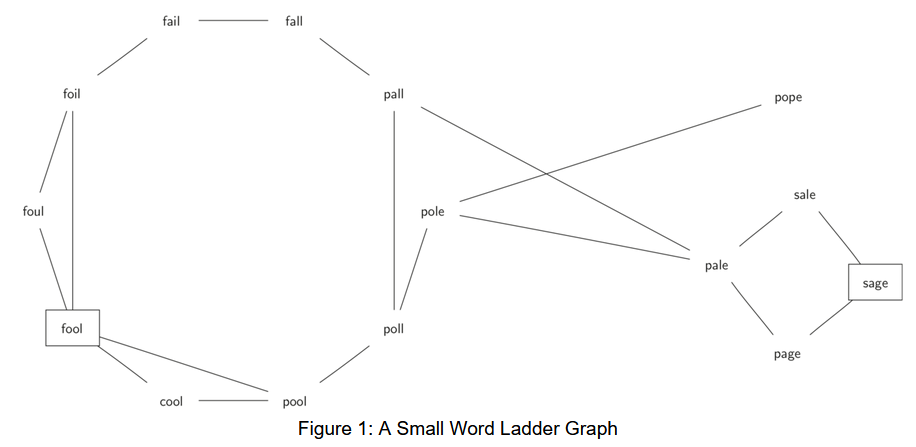

In [203]:
word_dict = {}
alpha = 'abcdefghijklmnopqrstuvwxyz'

In [204]:
with open('words.txt','r') as words:
    for line in words:
        word = ''.join([e for e in line if e.lower() in alpha]).upper()
        if len(word) == 4:
            for letter in range(4):
                partial = word[:letter] + '_' + word[letter+1:]
                if partial in word_dict:
                    word_dict[partial].append(word)
                else:
                    word_dict[partial] = [word]
                
                
        

If we used an adjacency matrix, we would have more than 26 million cells, with only ~50k of them stored, roughly 0.20% of its space used.

#  Implementing Breadth First Search

Given a graph G and a starting node s, BFS starts to explore the edges to find all vertices in G for which there is a path from s. It finds all nodes that are a distance _k_ from s before finding all nodes that are _k+1_ distance, and so on.

To keep track of all explored vertices, BFS uses a color system: all nodes are white, when a new one is discovered, it is colored gray, and when the node has been completed explored, it is colored black. <b> Once a node is colored black, there is no white node adjacent to it</b>

1- BFS starts on node _s_ and colors it gray to show that is currently being explored. Proceeding to the next nodes according to a queue system, when it finds an unexplored node, four things happen:

    -the new node is colored gray
    -the precedecessor of the new node is set to the current node
    -the distance to the current node is set to the distance of the current node + 1
    -the new node is added to the end of the queue, scheduling it for further exporation

In [161]:
def bfs(g, startNode):
    
    g[startNode].setDistance(0)
    
    vertQueue = Queue()
    
    vertQueue.enqueue(g[startNode])
    
    while vertQueue.size() > 0:
        
        currentVert = vertQueue.dequeue()
        
        for nextNode in currentVert.getConnections():
            if g[nextNode].getColor() == 'white':
                g[nextNode].setColor('gray')
                g[nextNode].setDistance(currentVert.getDistance()+1)
                g[nextNode].setPred(currentVert)
                vertQueue.enqueue(g[nextNode])
        currentVert.setColor('black')
        
                
        

In [179]:
def traverse(g,x):
    while g[x].getPred():
        print(g[x].getId())
        x = g[x].getPred().getId()
    print(g[x].getId())

In [172]:
bfs(g,0)

In [188]:
for key,values in word_dict.items():
    if 'FOOL' in word_dict[key]:
        print(key)

_OOL
FO_L
FOO_
F_OL


In [191]:
word_dict['_OOL']

['BOOL',
 'COOL',
 'DOOL',
 'FOOL',
 'GOOL',
 'HOOL',
 'MOOL',
 'POOL',
 'ROOL',
 'SOOL',
 'TOOL',
 'WOOL',
 'ZOOL',
 'ZOOL']

In [229]:
g2 = Graph()

In [228]:

def mapping(word,g2):
    
    queue = Queue()
    
    usedList = [word]
    queue.enqueue(word)
    
    while queue.size() > 0:
        
        currentword = queue.dequeue()
    
        for i in range(4):
            for j in  word_dict[currentword[:i] + '_' + currentword[i+1:]]:
                if j not in usedList:
                    usedList.append(j)
                    g2.addEdge(currentword,j)
                    queue.enqueue(j)
    return usedList
                
        
        

In [230]:
g2

In [231]:
test = mapping('FOOL',g2)

In [234]:
bfs(g2,'FOOL')

In [235]:
traverse(g2,'SAGE')

SAGE
SALE
SALL
SOLL
SOOL
FOOL


### BFS Analysis

In [ ]:
O(n_Nodes+n_Edges)

### The Knight's Tour Problem

Find sequence of moves that allow the knight to visit every square on the board exactly once. Each square represents a node in the graph, and the legal moves a knight can do between a square and another is represented by an edge.

In [63]:
def chess_boardGraph():
    chess_board = Graph()
    for i in range(ord('a'),ord('h')+1):
        for j in range(1,9):
            chess_board.addVertex((chr(i),j))
    
    current_keys = list(chess_board.get_Vertices())
    for col,row in current_keys:
    
        if ord(col) + 2 <= ord('h') and row +1 <= 8:
            chess_board.addEdge((col,row),(chr(ord(col)+2),row+1))

        if ord(col) + 2 <= ord('h') and row-1  >= 1:
            chess_board.addEdge((col,row),(chr(ord(col)+2),row-1))

        if ord(col) + 1 <= ord('h') and row -2 >=1 :
            chess_board.addEdge((col,row),(chr(ord(col)+1),row-2))

        if ord(col) - 1 >= ord('a') and row- 2  >= 1:
            chess_board.addEdge((col,row),(chr(ord(col)-1),row-2))

        if ord(col) -2 >= ord('a') and row +1 <= 8:
            chess_board.addEdge((col,row),(chr(ord(col)-2),row+1))

        if ord(col) - 2 >= ord('a') and row-1  >= 1:
            chess_board.addEdge((col,row),(chr(ord(col)-2),row-1))

        if ord(col) + 1 <= ord('h') and row +2 <= 8 :
            chess_board.addEdge((col,row),(chr(ord(col)+1),row+2))

        if ord(col) - 1 >= ord('a') and row+ 2  <= 8:
            chess_board.addEdge((col,row),(chr(ord(col)-1),row+2))
    return chess_board
    


In [64]:
chess_board = chess_boardGraph()

How to solve it? <b> Depth Search First </b>

## Depth First Search (DFS)

Whereas BFS builds a search tree one level at a time, DFS creates a search tree by exploring one branch of the tree as deeply as possible.

For the knights tour, DSF will forbid a node to be visited more than once. Unvisited nodes are colored white, while visited ones are colored gray. If all neighbors of a particular node have been visited, and we have not reached the 64 node visiting counting, we have reached a dead end. We then must trackback

In [65]:
def knightTour(n,path,graph,node,limit):
    path.append(node)
    
    graph[node].setColor('grey')
    
   
    
    if n < limit:
        
        done = False
        nextNodes = list(graph[node].getConnections())
        
        ###orderbyAvail
        nextNodes =  [x[1] for x in sorted([(len(graph[j].getConnections()),j) for j in nextNodes ],key=lambda x:x[0])]
            
        
        
        i = 0
        
        while i < len(nextNodes) and not done:
            
            if graph[nextNodes[i]].getColor() == 'white':
                done, path = knightTour(n+1,path,graph,nextNodes[i],limit)
            
                
            i+=1
            
        if not done:
            path.pop()
            graph[node].setColor('white')
        
    else:
        done = True
    
    return done , path
        
    
    

In [66]:
knightTour(1,[],chess_board,('a',1),64)

(True,
 [('a', 1),
  ('c', 2),
  ('e', 1),
  ('g', 2),
  ('h', 4),
  ('g', 6),
  ('h', 8),
  ('f', 7),
  ('h', 6),
  ('g', 8),
  ('e', 7),
  ('c', 8),
  ('a', 7),
  ('b', 5),
  ('a', 3),
  ('b', 1),
  ('d', 2),
  ('f', 1),
  ('h', 2),
  ('g', 4),
  ('f', 2),
  ('h', 1),
  ('g', 3),
  ('h', 5),
  ('g', 7),
  ('e', 8),
  ('c', 7),
  ('a', 8),
  ('b', 6),
  ('a', 4),
  ('b', 2),
  ('d', 1),
  ('e', 3),
  ('c', 4),
  ('a', 5),
  ('b', 7),
  ('d', 8),
  ('e', 6),
  ('f', 8),
  ('h', 7),
  ('g', 5),
  ('h', 3),
  ('g', 1),
  ('e', 2),
  ('c', 1),
  ('a', 2),
  ('c', 3),
  ('e', 4),
  ('d', 6),
  ('f', 5),
  ('d', 4),
  ('b', 3),
  ('c', 5),
  ('a', 6),
  ('b', 8),
  ('d', 7),
  ('f', 6),
  ('d', 5),
  ('f', 4),
  ('d', 3),
  ('b', 4),
  ('c', 6),
  ('e', 5),
  ('f', 3)])

Performance-wise is not that good O(K^N), where n is the number of squares on the chess board (remember: number of nodes in a binary tree of heigh N is 2^N - 1), so for a 8x8 chessboard, with a k factor of 5.25, we have 5.25^65 -1 or 1.3x10^46 nodes

To speed up its performance, we will use an additional function, _orderbyAvail_ which will be used in place of _get.Connections()_. It forces the knight to move first to the squares with least available moves, making the knight visiting first the hard-to-reach corners early and  using the middle squares only when necessary

## General Depth First Search

The Knight tour is a special case of a depth first search where the goal is to create the deepest depth first tree  without branches. The more general depth first search is easier, with the goal to search as deeply as possible, connecting as many nodes in the graph as possible and branching where necessary.

Sometimes depth first search will create more than one tree (depth first forest). 

DFS will use two additional instances in the Vertex class: _discovery_ and _finish_ times. The discovery time tracks the number of steps in the algorithm before a vertex is first encountered. The finish time is the number of steps in the algorithm before a vertex is colored black.

In [48]:
class DFSGraph(Graph):
    def __init__(self):
        super().__init__()
        self.time = 0
        
    def dfs(self):
        for aVertex in self.get_Vertices():
            self[aVertex].setColor('white')
            self[aVertex].setPred(-1)
        for aVertex in self.get_Vertices():
            if self[aVertex].getColor() == 'white':
                self.dfsvisit(aVertex)
                
    def dfsvisit(self,startVertex):
        self[startVertex].setColor('gray')
        self.time+=1
        self[startVertex].setDiscovery(self.time)
        for nextVertex in self[startVertex].getConnections():
            if self[nextVertex].getColor() == 'white':
                self[nextVertex].setPred(startVertex)
                self.dfsvisit(nextVertex)
        self[startVertex].setColor('black')
        self.time+=1
        self[startVertex].setFinish(self.time)
    
    def topologicalSorting(self):
        #get vertices, their discovery and finish times, sort them by the highest discovery time
        
        return [j for j in sorted([(i,test[i].d,test[i].f) for i in self.get_Vertices()],key = lambda x:x[2],reverse = True)]

In [49]:
test = DFSGraph()

In [50]:
test.addEdge('cup_milk','cup_mix')
test.addEdge('1_egg','cup_mix')
test.addEdge('1_tbl_oil','cup_mix')
test.addEdge('cup_mix','pour_cup')
test.addEdge('cup_mix','heat_syrup')
test.addEdge('heat_syrup','eat')
test.addEdge('pour_cup','turn_when_bubbly')
test.addEdge('turn_when_bubbly','eat')
test.addEdge('heat_griddle','pour_cup')


In [51]:
test.dfs()

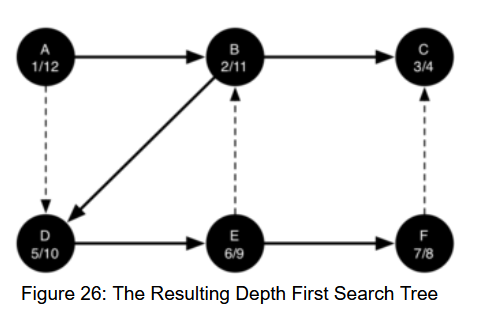

The starting and finishing times for each node display a property called <b>The parenthesis property</b>. All the children of a particular node in the depth first tree have a later discovery time and an earlir finish time thant their parent 

## DFS analysis

The loops in dfs both run in O(V). In the dfsvisit the loop is executed once for each edge in the adhacency list of the current vertex. Total performance is O(V+E)

# Topological Sorting

A topological sort takes a DAG and produces a linear ordering of all its vertices such taht if the graph G contains an edge (v,w) then the vertex v comes before the vertex w in the ordering.

Topological sortings is a useful adaptation of a depth first search.

    1. Call dfs(g) for some graph g. 
    2. Store the vertices in a list in decreasing order of finish time
    3. Return the ordered list as the result of the topological sort.

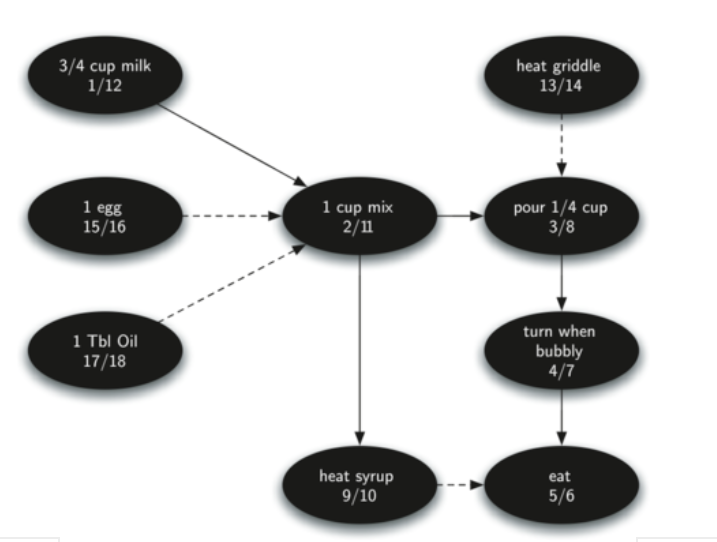

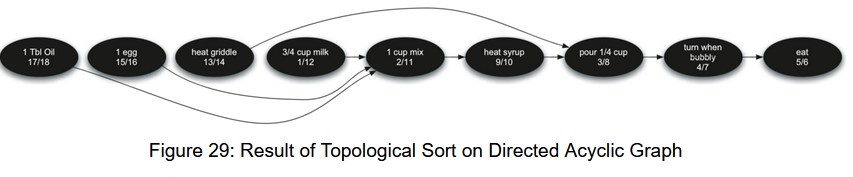

In [53]:
test.topologicalSorting()

[('heat_griddle', 17, 18),
 ('1_tbl_oil', 15, 16),
 ('1_egg', 13, 14),
 ('cup_milk', 1, 12),
 ('cup_mix', 2, 11),
 ('heat_syrup', 9, 10),
 ('pour_cup', 3, 8),
 ('turn_when_bubbly', 4, 7),
 ('eat', 5, 6)]

## Strongly Connected Components.

### Strongly Connected Component (SCC) 

For every pair of vertices _v_,_w_ in a <b>strongly connected component </b> _C_ of a graph _G_, we have a path from _v_ to _w_ and a path from _w_ to _v_

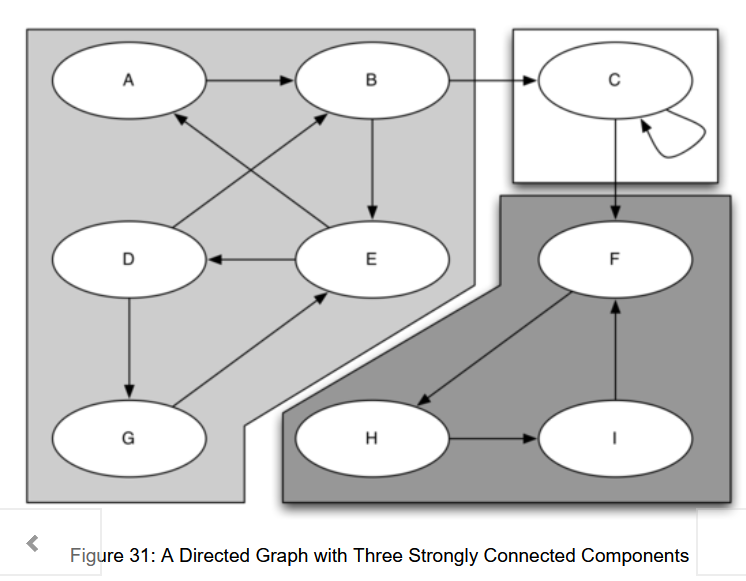

Once the strongly connected components have been identified, we can show a simplfied view of the graph by combinin all the vertices in one strongly connected component into a single larger vertex

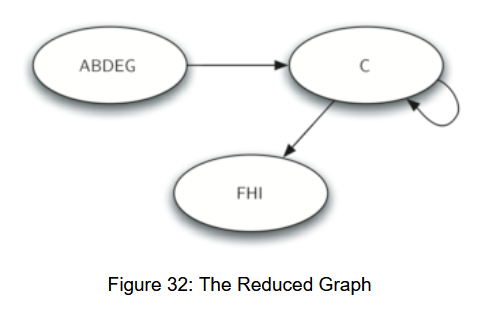

#### Transposition of a Graph

The transposition of a graph <b>_G_</b> is the graph G with all its edges reveresed, i.e., if there is a directed edge from node A to node B in G, G_transposed will have a directed edge from B to A.

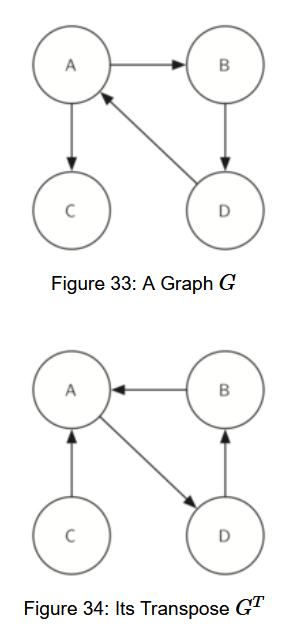

### SCC algorithm

    1. Call dfs for G to compute the finish times of each vertex;
    2. Compute G_transpose;
    3. Call dfs for G_transpose but the main loop of  DFS explores each vertex in decreasing order of finish time;
    4. Each tree in the forest computed in step 3 is a strongly connected component. Outo the vertex ids for each vertex in each tree in the forest to identify the component.
    
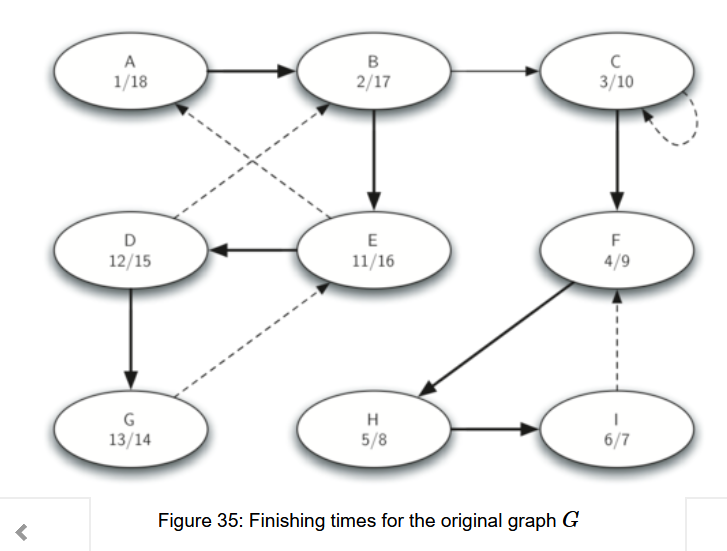

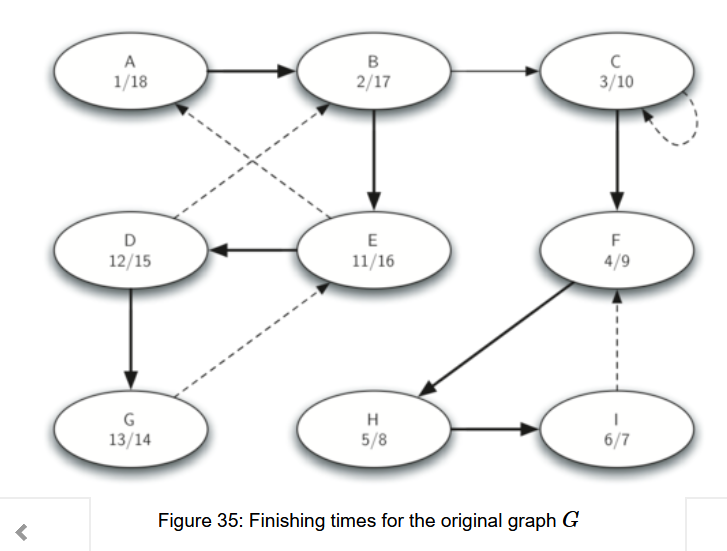

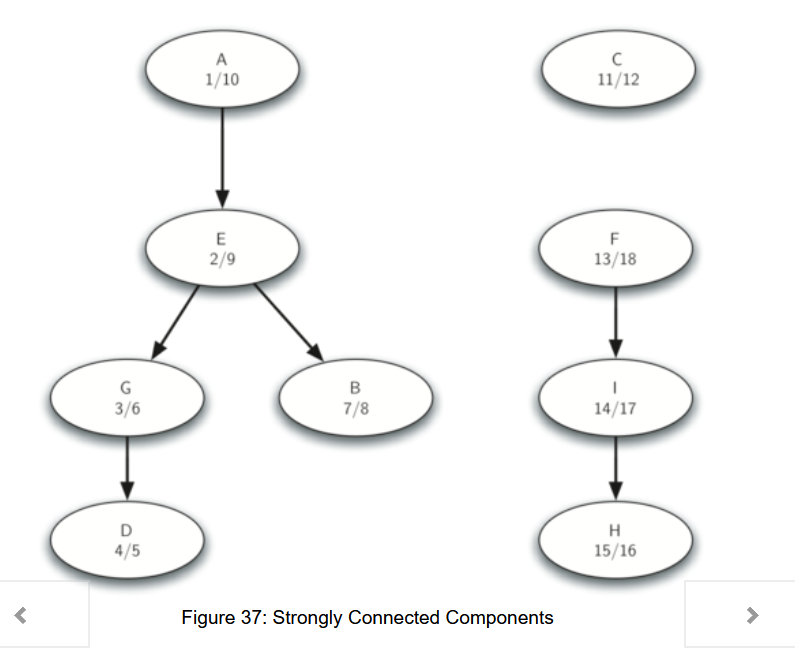

### Shortest Path Problems

In [22]:
def dfs(nums,pos,prev = None):
    
    if pos + nums[pos]+1 >= len(nums):
        return True
    
    elif nums[pos] == 0:
        return False
    
    else:
        available_paths = []
        for incr in range(nums[pos]):
            if incr+1+pos >= len(nums):
                return True
            available_paths.append((incr+1+pos,incr+1+nums[incr+1+pos]))
        sorted_available_paths = [x[0] for x in sorted(available_paths, key =lambda x : (x[1],x[0]), reverse= True)]
        
        for i in sorted_available_paths:
            res = dfs(nums,i)
            
            if res == True:
                break
    return res
        
        
        
            
            
    

   


